# Predicting edible Mushrooms

### Table of Contents
[__1. Introduction__ ](#first_bullet)

[__2. Problem Definition and Algorithm__](#second_bullet)

[__3. Methodolgy__](#third_bullet)

[__4. Data Preparation__](#fourth_bullet)

[__5. Data Exploration and Visualisation__](#fifth_bullet)

[__6. Predictive Modelling__](#sixth_bullet)

[__7. K Nearest Neighbours__](#seventh_bullet)

[__8. Discussion__](#eigth_bullet)

[__9. Results__](#ninth_bullet)

[__10. Results__](#tenth_bullet)

#### <a class="anchor" id="first-bullet">1. Introduction</a>
The objective of this project is to compares a three types of Machine Learning models that classify edible mushrooms, from a dataset of edible, non-edible and poisonous mushrooms based on a range of descriptive features. The data was sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Mushroom). The dataset contains one target feature 'class', and 23 categorical, descriptive features based on the characteristics of the mushrooms observed. The target feature is binary and contains two categories, 'e' for edible and 'p' for poisonous, where 'e' shall be our positive target feature and 'p' contains poisonous and non-edible mushrooms.

#### <a class="anchor" id="second-bullet">2. Problem Definition and Algorithm</a>
Mushroom picking has seen an increase in popularity over the past few years, especially coming into the European and Australian picking seasons. Wet weather, combined with the Covid-19 lockdowns has provided Australians with an excuse to exercise in forests around Australia, while foraging for mushrooms. Health authorities are warning that this has been one of the busiests periods in recent memory with a significant spike in calls to the poison hotline, and are urging foragers not to consume mushrooms unless they are an expert (Visontay, 2020). 

As a passionate European mushroom picker, there is a significant difference in the types of mushrooms that you can find foraging while in Australia. While I would consider myself an expert in identifying mushrooms, I have little familiarity in the select few edibles mushooms that are found here, and I can see the benefit developing a Machine Learning model to help identify mushrooms based on characteristics that I know how to identify. While I wouldn't solely rely only on the model to consume mushrooms, I can see it's application while assisting an expert. Future applications of this model could include an image recognition component to help identify mushrooms based on their visual characteristics. 

#### 2.1 Attribute Information

All attributes are nominal descriptive features, therefore one hot encoding will be used to encode them.

- class: edible=e,poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

#### <a class="anchor" id="third-bullet">3. Methodology</a>
As this is a classifcation problem, I will use a selection of algorithms including a similarity based learning algorithm K Nearest Neighbours, information based learning algorithm, Decision Trees and a probability based learning model, Naive Bayes. The dataset has around 8000 rows, however, some of the descriptive features have many factors, so in order to keep computation to a minium, I will be using a smaller sample of 5,000 samples and using a 75% training and 25% testing split. 

#### <a class="anchor" id="fourth-bullet">4. Data Preparation</a>
Importing the necessary libraries for working with this dataset, and preprocessing the dataset. 

In [1]:
import pandas as pd
import numpy as np
import os, ssl

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split, GridSearchCV
from sklearn import feature_selection as fs

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

# setting all the columns to be visible
pd.set_option('display.max_columns', None) 

if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
df = pd.read_csv('s3455453_Data.csv')

# Checking the shape of the dataset to make sure it imported correctly
df.shape

(8124, 23)

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


#### 4.1 Missing Values
Removing any missing values from the dataset. We observe that the stalk root column has a missing value, encoded as '?', and the veil type is one constant value rendering it a redundant feature to be removed from the dataset. We can see there are quite a number of missing values for stalk root, where we have several options. We can either remove the rows missing that descriptive feature, remove the descriptive feature entirely, impute the missing feature using the mode, or leave it as a valid attribute. With my experience picking mushrooms, I assume that the stalk was actually missing from the mushroom when observed, therefore decision was made to drop the column.

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [6]:
df.groupby('stalk-root')['class'].count()

stalk-root
?    2480
b    3776
c     556
e    1120
r     192
Name: class, dtype: int64

In [7]:
df.drop(columns = ['stalk-root', 'veil-type'], inplace = True)
df.describe(include='all').transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


#### 4.2 Standardisation
Data does not need to be standardised as it is in one hot encoded format and all data is between 0 and 1.

#### <a class="anchor" id="fifth-bullet">5. Data Exploration and Visualisation</a>
#### 5.1 Univariate Plots
We can see below that the target feature is relatively equally distributed between edible and poisonous mushroom types, which means that we won't necessarily need to use a stratified sampling method for our cross validation.

Colour is an easily identifiable attribute in mushroms, where one can easily look at the top (cap) or underside (gill) of a mushroom to distinguish the type of mushroom that they are observing. We can see that there are many mushrooms with a dark cap (Black, Brown, Buff, Gray), with a high proportion of the undersides being Purple, or another dark colour. This is interesting as it could help us group mushrooms based on the subjective lightness/ darkness in colour of their cap and gill colour.  

In [8]:
gill_colour = ('Black', 'Brown', 'Buff', 'Chocolate', 'Gray', 'Green', 'Orange', 'Pink', 'Purple', 'Red', 'White', 'Yellow')
cap_colour = ('Brown', 'Buff', 'Cinnamon', 'Gray', 'Green', 'Pink', 'Purple', 'Red', 'White', 'Yellow')
odour = ('Almond', 'Anise', 'Creosote', 'Fishy', 'Foul', 'Musty', 'None', 'Pungent', 'Spicy')
mushroom_class = ('Poisonous', 'Edible')

[Text(0, 0, 'Poisonous'), Text(0, 0, 'Edible')]

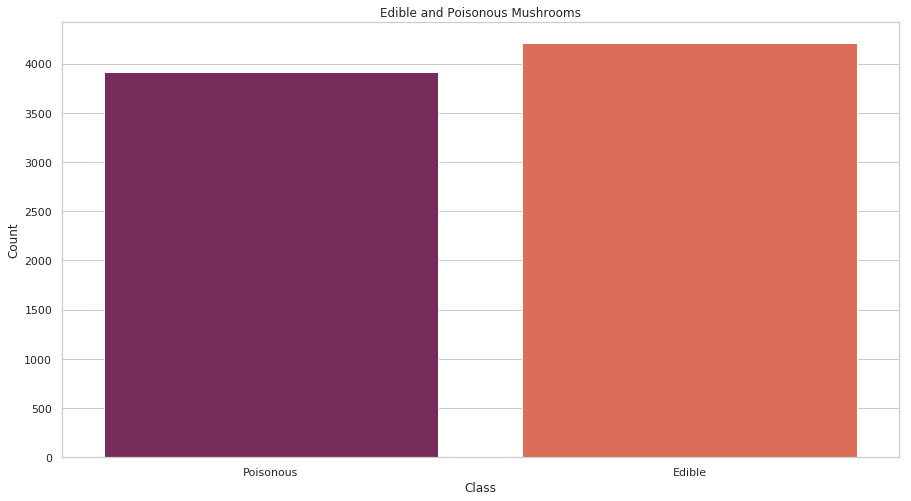

In [9]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (15,8))

ax = sns.countplot(x = df['class'], palette = 'rocket')
ax.set(title = 'Edible and Poisonous Mushrooms', xlabel = 'Class', ylabel = 'Count')
ax.set_xticklabels(mushroom_class)

[Text(0, 0, 'Black'),
 Text(0, 0, 'Brown'),
 Text(0, 0, 'Buff'),
 Text(0, 0, 'Chocolate'),
 Text(0, 0, 'Gray'),
 Text(0, 0, 'Green'),
 Text(0, 0, 'Orange'),
 Text(0, 0, 'Pink'),
 Text(0, 0, 'Purple'),
 Text(0, 0, 'Red'),
 Text(0, 0, 'White'),
 Text(0, 0, 'Yellow')]

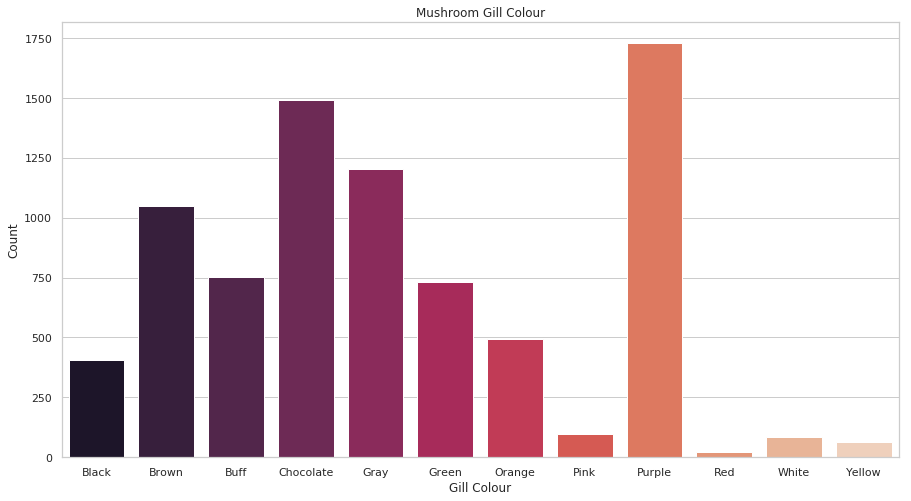

In [10]:
plt.figure(figsize = (15,8))

ax = sns.countplot(x = df['gill-color'], palette = 'rocket')
ax.set(title = 'Mushroom Gill Colour', xlabel = 'Gill Colour', ylabel = 'Count')
ax.set_xticklabels(gill_colour)

[Text(0, 0, 'Brown'),
 Text(0, 0, 'Buff'),
 Text(0, 0, 'Cinnamon'),
 Text(0, 0, 'Gray'),
 Text(0, 0, 'Green'),
 Text(0, 0, 'Pink'),
 Text(0, 0, 'Purple'),
 Text(0, 0, 'Red'),
 Text(0, 0, 'White'),
 Text(0, 0, 'Yellow')]

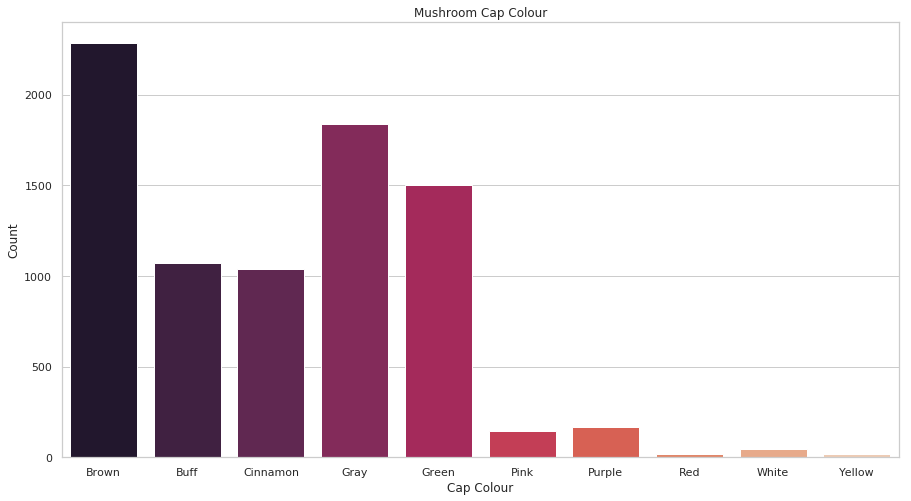

In [11]:
plt.figure(figsize = (15,8))

ax = sns.countplot(x = df['cap-color'], palette = 'rocket')
ax.set(title = 'Mushroom Cap Colour', xlabel = 'Cap Colour', ylabel = 'Count')
ax.set_xticklabels(cap_colour)

#### 5.2 Bivariate Plots
Using the Gini index to measure entropy between the target variable and the feature variables, we can see that there are several stnadout candidate features for exploration.

Although the information gain when using cap clour is low, I was interested on having a deeper look into this, as my experince informs me that many mushrooms with dangerous looking colours like red, pink and purple are more often poisonous. However, looking at cap colour compared with our target feature, we can see that there is a relatively equal distribution between edible and poisonous mushrooms when observing the cap colour of certain mushrooms. 

Conversely, when looking at the comparison between gill colour and mushroom class, we can see that there are some interesting correlations between the colour of the gills and the edibility of the mushroom, particularly in purple gilled mushrooms (which are all poisonous), and green, pink and white mushroom which are usually more edible.

Mushroom odour seems to be very indicative of our target feature, where only a fishy smell seems to be slightly unpredictable.

In [12]:
# Code repurposed from Assignment 2
def compute_gini(feature):
    """
    A function that takes in a feature and computes the gini index
    """
    
    probs = feature.value_counts(normalize=True)
    impurity = round(1 - np.sum(np.square(probs)), 3)
    
    return(impurity)

def compute_remainder_gini(df, target_feature, descriptive_feature):
    """
    Calculates the remainder entropy of each level of the descriptive feature through the gini index 
    """

    # Initialising the remainder entropy value for each descriptive feature
    rem = 0

    # Calculate the weighted entropy of each unique level of a descriptive feature
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        target_impurity = compute_gini(df_feature_level[target_feature])
        partition_weight = len(df_feature_level) /(len(df))
        
        # Calculate the weighted remainder
        rem = round(rem + partition_weight * target_impurity, 3)
    return(rem)

def information_gain_gini(df, target_feature, descriptive_feature):
    
    """
    Calculates the information gain of a particular descriptive feature, measured against a target feature within a dataset
    """
    
    # Calculate the impurity of the target feature
    target_impurity = compute_gini(df[target_feature])
    
    # Calculate the remainder of the descriptive feature
    rem = compute_remainder_gini(df, target_feature, descriptive_feature)
    
    # Calculate the information gain of each descriptive feature, rounding to 3 decimal places
    information_gain = round(target_impurity - rem, 3)
    
    return(information_gain)

[Text(0.5, 0, 'class'),
 Text(1.5, 0, 'cap-shape'),
 Text(2.5, 0, 'cap-surface'),
 Text(3.5, 0, 'cap-color'),
 Text(4.5, 0, 'bruises'),
 Text(5.5, 0, 'odor'),
 Text(6.5, 0, 'gill-attachment'),
 Text(7.5, 0, 'gill-spacing'),
 Text(8.5, 0, 'gill-size'),
 Text(9.5, 0, 'gill-color'),
 Text(10.5, 0, 'stalk-shape'),
 Text(11.5, 0, 'stalk-surface-above-ring'),
 Text(12.5, 0, 'stalk-surface-below-ring'),
 Text(13.5, 0, 'stalk-color-above-ring'),
 Text(14.5, 0, 'stalk-color-below-ring'),
 Text(15.5, 0, 'veil-color'),
 Text(16.5, 0, 'ring-number'),
 Text(17.5, 0, 'ring-type'),
 Text(18.5, 0, 'spore-print-color'),
 Text(19.5, 0, 'population'),
 Text(20.5, 0, 'habitat')]

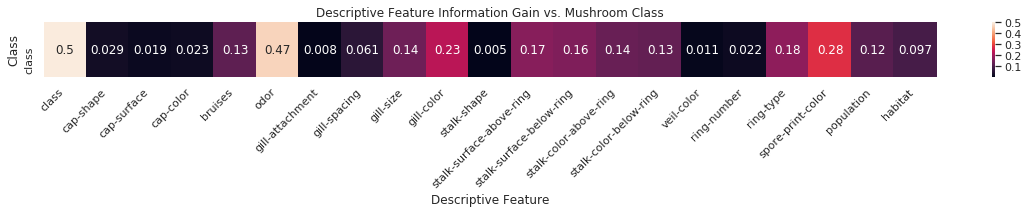

In [13]:
plt.figure(figsize=(20,1))
heat = pd.DataFrame(index = ['class'], columns = df.columns)

for i in df.columns:
    igg = information_gain_gini(df, 'class', i)
    heat.loc[:,i] = igg
    heat.fillna(value=np.nan,inplace = True)

ax = sns.heatmap((heat), annot = True)
ax.set(title = 'Descriptive Feature Information Gain vs. Mushroom Class', ylabel = 'Class', xlabel = 'Descriptive Feature') 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

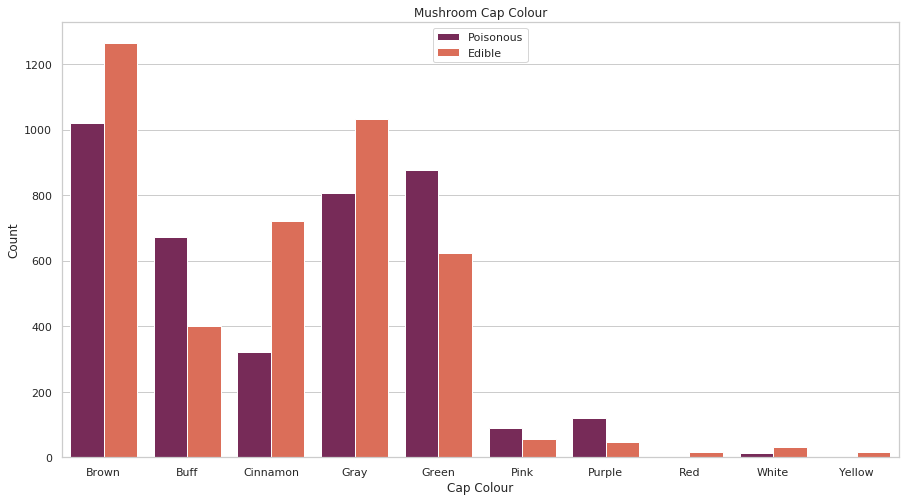

In [14]:
plt.figure(figsize = (15,8))

ax = sns.countplot(x = df['cap-color'], hue = df['class'], palette = 'rocket')
ax.set(title = 'Mushroom Cap Colour', xlabel = 'Cap Colour', ylabel = 'Count')
ax.set_xticklabels(cap_colour)
ax.legend(mushroom_class, loc = 0)

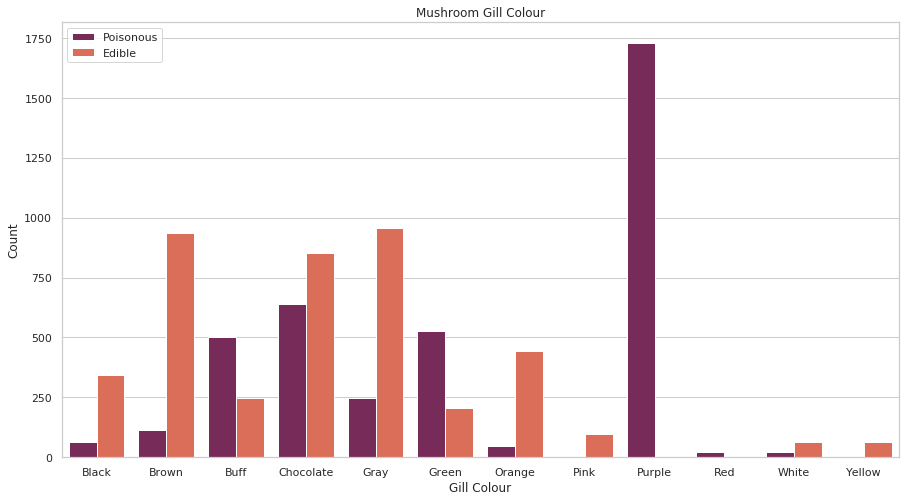

In [15]:
plt.figure(figsize = (15,8))

ax = sns.countplot(x = df['gill-color'], hue = df['class'], palette = 'rocket')
ax.set(title = 'Mushroom Gill Colour', xlabel = 'Gill Colour', ylabel = 'Count')
ax.set_xticklabels(gill_colour)
ax.legend(mushroom_class, loc = 0)

[Text(111.5, 0.5, 'Class'),
 Text(0.5, 48.5, 'Gill Colour'),
 Text(0.5, 1.0, 'Mushroom Gill Colour vs. Class')]

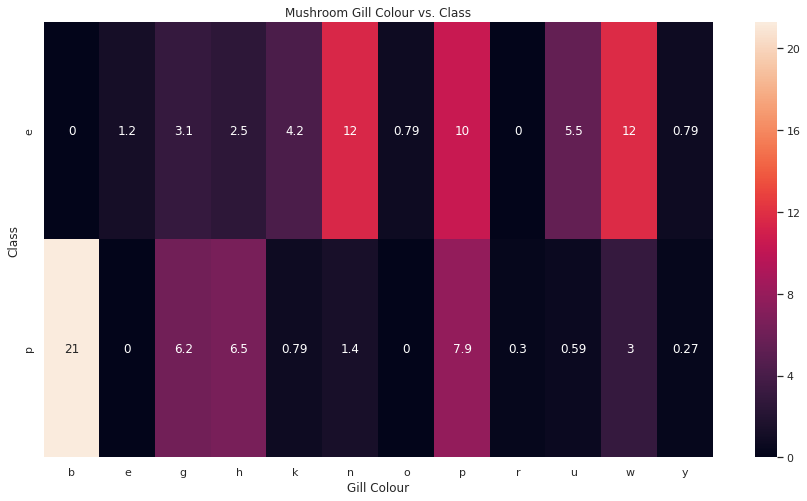

In [16]:
gill_class = pd.crosstab(df['class'], df['gill-color'], normalize = True) * 100
plt.figure(figsize = (15,8))

ax = sns.heatmap(gill_class, annot = True)
ax.set(title = 'Mushroom Gill Colour vs. Class', xlabel = 'Gill Colour', ylabel = 'Class')

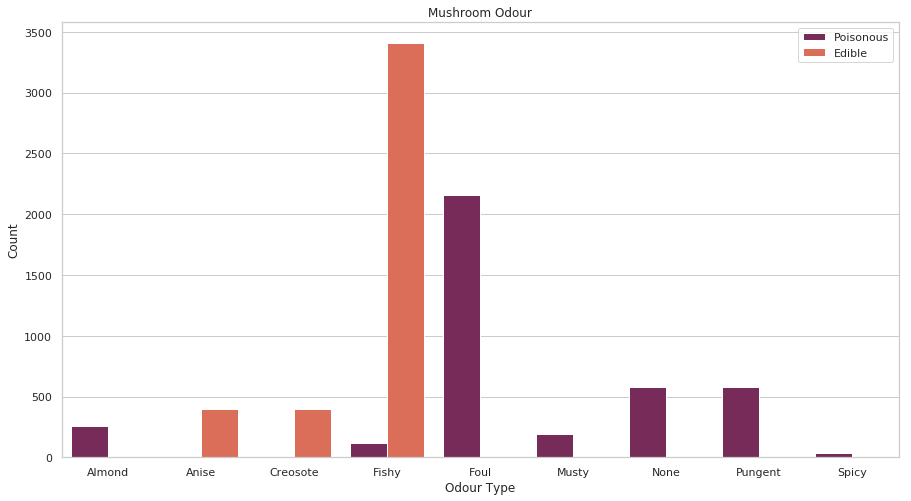

In [17]:
plt.figure(figsize = (15,8))

ax = sns.countplot(x = df['odor'], hue = df['class'], palette = 'rocket')
ax.set(title = 'Mushroom Odour', xlabel = 'Odour Type', ylabel = 'Count')
ax.set_xticklabels(odour)
ax.legend(mushroom_class, loc = 0)

[Text(111.5, 0.5, 'Odour Type'),
 Text(0.5, 48.5, 'Class'),
 Text(0.5, 1.0, 'Mushroom Odour vs. Class')]

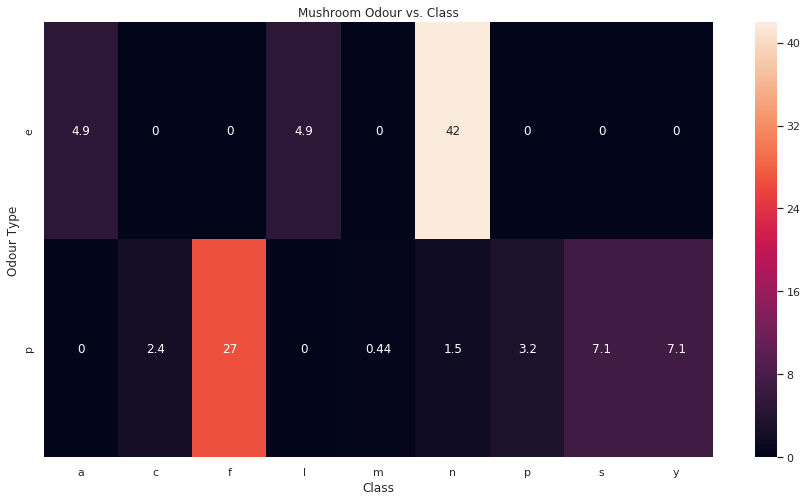

In [18]:
gill_class = pd.crosstab(df['class'], df['odor'], normalize = True) * 100
plt.figure(figsize = (15,8))

ax = sns.heatmap(gill_class, annot = True)
ax.set(title = 'Mushroom Odour vs. Class', xlabel = 'Class', ylabel = 'Odour Type')

#### 5.3 Multivariate Plots
Expanding from the two dimensional heatmap above, we can get a better understanidng of the full dataset and how other features relate to each other in terms of the gini index. We can see small clusters of descriptive features including ring type and spore print that are more heterogenous when compared with other features.

[Text(156.5, 0.5, 'Descriptive Features'),
 Text(0.5, 111.5, 'Descriptive Features'),
 Text(0.5, 1.0, "Gini Index of Mushroom's Descriptive Features")]

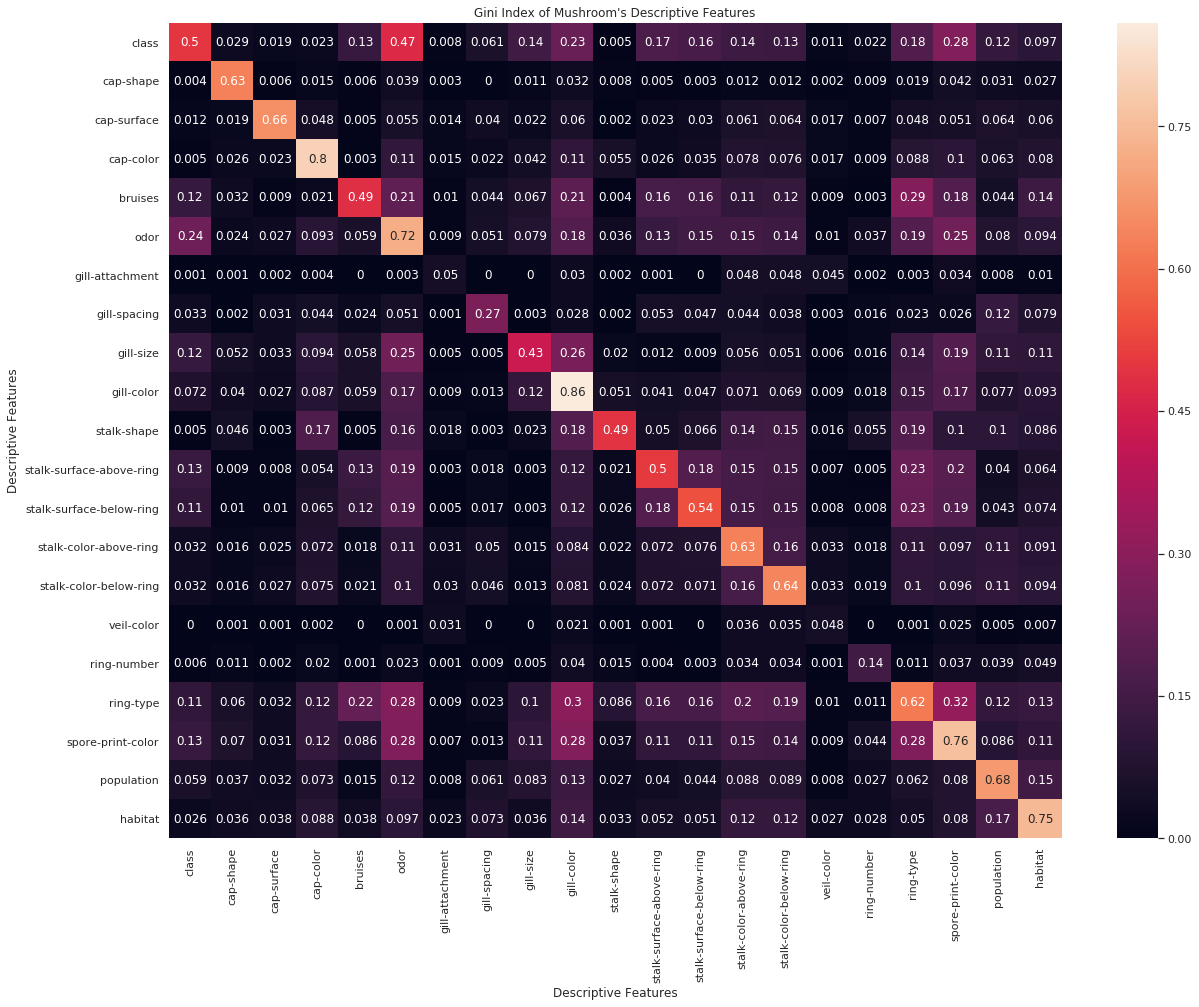

In [19]:
plt.figure(figsize = (20, 15))
heat_full = pd.DataFrame(index = df.columns, columns = df.columns)

for i in df.columns:
    for j in df.columns:
        igg = information_gain_gini(df, j, i)
        heat_full.loc[j,i] = igg
        heat_full.fillna(value=np.nan,inplace = True)    
        
sns.heatmap(heat_full, annot = True).set(title = "Gini Index of Mushroom's Descriptive Features", xlabel = 'Descriptive Features', ylabel = 'Descriptive Features')

#### <a class="anchor" id="sixth-bullet"> 6. Predictive Modelling</a>
We will select features based on mutual information, which uses entropy to determine a descriptive features relevance in predicting the target feature. Using cross validation with a base estimator of a K Nearest Neighbours Classifier, we will fine tune our Hyper Parameters of our models to compare the best model. Accuracy shall be the scoring metric.

In [20]:
# Separating target and descriptive features
X = df.drop(columns = 'class')
y = df['class']

In [21]:
# Encoding 'e' as the positive, target feature
y_encoded = np.where(y == 'e', 1, 0)
np.unique(y_encoded, return_counts = True)

(array([0, 1]), array([3916, 4208]))

In [22]:
# Performing One Hot Encoding on the categorical features
X = pd.get_dummies(X, drop_first = True)
X.head(5)

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### 6.1 Feature Selection Using Mutual Information
As we have explored entropy in earlier examples, we will continue to use entropy as a measure between the target feature and descriptive features. Unsurprisingly, as we've discovered earlier, odour, gill size and spore colour are all important. 

In [23]:
number_features = 10

fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k = number_features)
fs_fit_mutual_info.fit_transform(X, y)

fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:number_features]
best_features_mutual_info = X.columns[fs_indices_mutual_info].values

best_features_mutual_info

array(['odor_n', 'odor_f', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k', 'gill-size_n', 'ring-type_p',
       'spore-print-color_h', 'ring-type_l', 'bruises_t',
       'stalk-surface-above-ring_s'], dtype=object)

In [24]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.36575899, 0.25271572, 0.19754204, 0.17882933, 0.16444806,
       0.15777125, 0.14134809, 0.13895423, 0.13823384, 0.12963204])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

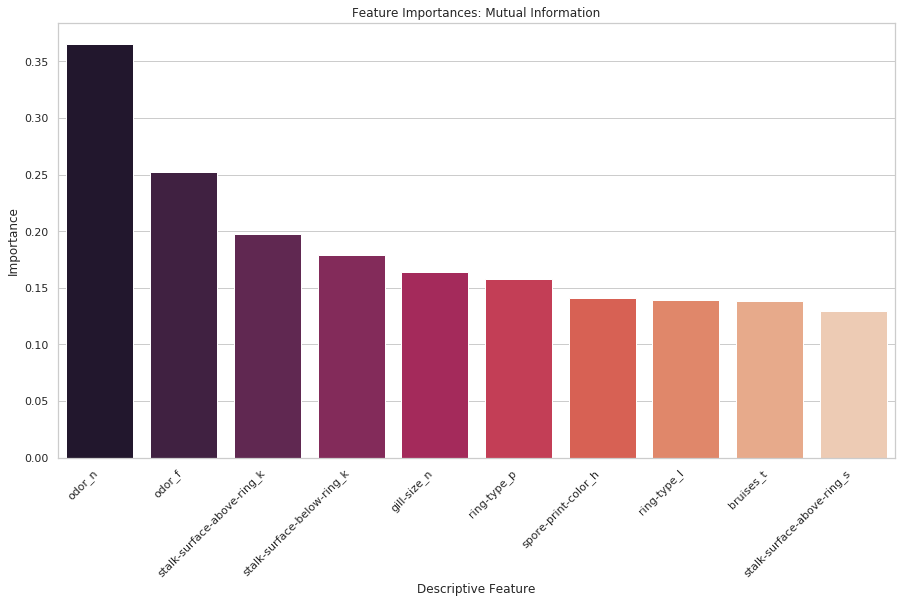

In [25]:
plt.figure(figsize =(15,8))
ax = sns.barplot(x = np.array(best_features_mutual_info), y = np.array(feature_importances_mutual_info), palette = "rocket")
ax.set(xlabel = "Descriptive Feature", ylabel = "Importance", title = "Feature Importances: Mutual Information")
plt.xticks(rotation = 45, horizontalalignment = 'right')

#### 6.2 Data Sampling and Test Splitting
As stated in our Methodology, we will narrow the dataset to 5000 random samples to improve computation time and split the training and testing data 75/25. 

In [26]:
# Setting 5000 samples to be taken from the full dataset
number_samples = 5000

# Converting Pandas dataframe into a Numpy array for better calculation
X_sample = pd.DataFrame(X).sample(n = number_samples, random_state = 1).values
y_sample = pd.DataFrame(y).sample(n = number_samples, random_state = 1).values

# Ensuring the shape of our data remains intact
print(X_sample.shape)
print(y_sample.shape)

(5000, 91)
(5000, 1)


In [27]:
# Splitting the sample data into training and testing data
X_sample_train, X_sample_test, y_sample_train, y_sample_test = train_test_split(X_sample, y_sample, test_size = 0.25, random_state = 1)

# Using the mutual info feature selection to train our models
X_train = X_sample_train[fs_indices_mutual_info]
y_train = y_sample_train[fs_indices_mutual_info]

# Ensuring the shape of our data remains intact
print(X_sample_train.shape, X_sample_test.shape)

(3750, 91) (1250, 91)


#### 6.3 Model Evaluation
We will use a 5 fold cross validation and test them on the 25% of testing data where our scoring metric shall be accuracy. We will use a K Nearest Neighbours classifier as a wrapper for testing the cross vaidator, which yields an impressive 99% accuracy score. We are using accuracy as a metric as we are fine if we misclassify edible mushrooms, we are more concerned if we misclassify a poisonous mushroom as this would be fatal.

In [28]:
# Defining a cross validation method, as the target feature is equally distributed, only repeated K fold is necessary
cv_method = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 0)

# As we are aiming to determine the True Positive metric of the model
scoring_metric = 'accuracy'

# Setting a base wrapper
clf = KNeighborsClassifier(n_neighbors = 1)

In [29]:
# Instantiaiting a cross validator on the full dataset
cv_results_full = cross_val_score(estimator = clf,
                             X = X,
                             y = y, 
                             cv = cv_method, 
                             scoring = scoring_metric)

In [30]:
# Printing the array of full cross validation results
cv_results_full

array([0.99938462, 1.        , 1.        , 1.        , 0.99938424,
       0.99938462, 0.99938462, 0.99938462, 1.        , 0.99938424,
       1.        , 1.        , 0.99938462, 1.        , 0.99876847])

In [31]:
# Rounding to 5 decimal places
cv_results_full.mean().round(5)

0.99963

#### <a class="anchor" id="seventh-bullet">7. K Nearest Neighbours</a>

In [32]:
# Setting the parameters for the KNN model
parameters_knn = {'n_neighbors' : [1,2,3,4,5,6,7,8],
                 'p': [1,2,5]}

# Instantiating a Grid Search Cross Validator
grid_search_knn = GridSearchCV(estimator = KNeighborsClassifier(), 
                      param_grid = parameters_knn, 
                      cv = cv_method,
                      verbose = 1,
                      scoring = scoring_metric)

In [33]:
# Fitting the model on our training data
grid_search_knn.fit(X_train, y_train)

Fitting 15 folds for each of 24 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    3.4s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x7f30e108c048>,
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8], 'p': [1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [34]:
# Retrieving results of the Hyperparameter tuning
results_knn = pd.DataFrame(grid_search_knn.cv_results_['params'])
results_knn['test_score'] = grid_search_knn.cv_results_['mean_test_score']
results_knn['metric'] = results_knn['p'].replace([1,2,5], ['Manhattan', 'Euclidean', 'Minowski'])
results_knn

,n_neighbors,p,test_score,metric
0,1,1,0.800000,Manhattan
1,1,2,0.800000,Euclidean
2,1,5,0.800000,Minowski
3,2,1,0.600000,Manhattan
4,2,2,0.600000,Euclidean
5,2,5,0.600000,Minowski
6,3,1,0.733333,Manhattan
7,3,2,0.733333,Euclidean
8,3,5,0.733333,Minowski
9,4,1,0.633333,Manhattan


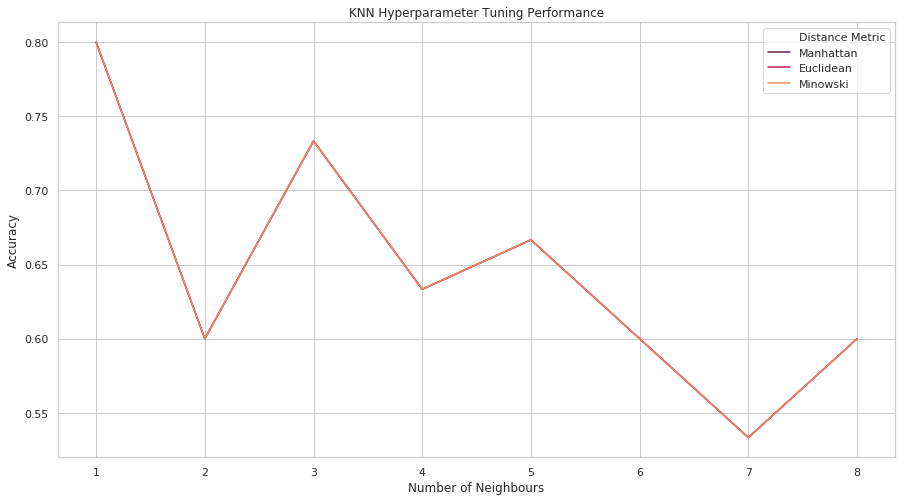

In [35]:
plt.figure(figsize = (15,8))

ax = sns.lineplot(palette = 'rocket', x = 'n_neighbors', y = 'test_score', hue = 'metric', data = results_knn)
ax.set(title = 'KNN Hyperparameter Tuning Performance', xlabel = 'Number of Neighbours', ylabel = 'Accuracy')

legend = ax.legend()
legend.texts[0].set_text("Distance Metric")

This charts seems to indicate that selecting a the nearest neighbour using any of the distance metrics provides a reasonal accuracy resull of 70% when using the sampled dataset, with the 10 best features.

#### <a class="anchor" id="eighth-bullet">8. Discussion</a>
I believe where I fell down was the Mushrooms dataset. The cross validation score of 100% threw off the project, and I do not understand what I need to do to pursue a valid result. It did not seem worth redoing the project with another dataset, nor continuing to fit the other models to the data set, as there is nothing to gain. Better data selection will be enforced next time a project like this is undertaken, making sure to utilise a mixture of categorical and metric based features.

#### <a class="anchor" id="ninth-bullet">9. References</a>
It is clear that there is something awry with the dataset. Other existing studies have found that several features including odour and gill colour can model this dataset with 100% accuracy, where this seems to be supported when selecting features using mutual information.

#### <a class="anchor" id="tenth-bullet">10. Results</a>
Visontay, E. (2020). 'Mushroom foragers warned amid jump in poisonings in Australia', _The Guardian, Australia_, 13 May. Available at: https://www.theguardian.com/australia-news/2020/may/13/mushroom-foragers-warned-amid-jump-in-poisonings-in-australia (Accessed 30 May)